# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [ ]:
# First question: Is the distribution of body temperatures normal? 
## I use three ways to examine the normality: histogram, qq plot and statistical tests

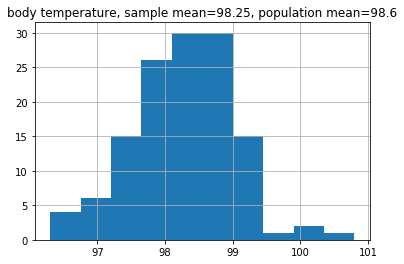

In [28]:
import matplotlib.pyplot as plt

df.hist('temperature')
plt.title('body temperature, sample mean={}, population mean=98.6'.format(round(df.temperature.mean(), 2)))
plt.show()

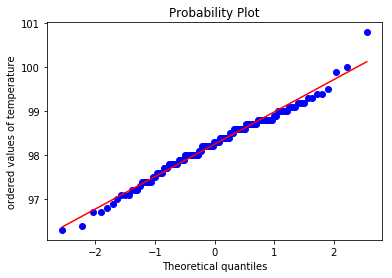

In [9]:
import numpy as np 
import scipy.stats as stats

stats.probplot(df.temperature, dist="norm", plot=pylab)
plt.ylabel('ordered values of temperature')
plt.show()

In [22]:
res=stats.shapiro(df.temperature)
print ("Results of Shapiro-Wilk test of normality:\n test statistics={}\n p-value={}\n".format(res[0],res[1]))


res=stats.kstest(df.temperature, cdf='norm')
print ("Results of Kolmogorov-Smirnov test of normality:\n test statistics={}\n p-value={}\n".format(res[0],res[1]))


res=stats.anderson(df.temperature)
print ("Results of Anderson-Darling test of normality:\n test statistics={}\n p-value={}".format(res[0],res[1][2]))

Results of Shapiro-Wilk test of normality:
 test statistics=0.9865769743919373
 p-value=0.2331680953502655

Results of Kolmogorov-Smirnov test of normality:
 test statistics=1.0
 p-value=0.0

Results of Anderson-Darling test of normality:
 test statistics=0.5201038826714353
 p-value=0.765


# Second question: Is the sample size large? Are the observations independent? 

Most statistics that test for normality suggest that there is not statistically significant difference between the sample distribution and normal distribution. From this perspective, the sample size is large enough for normality to hold. 

The minimum sample size required for a given standard deviation, delta (0.73 for human body temporature) and table value of standard normal distribution for a given desired confidence interval, Z(1.96 for CI=95%) and margin of error E(i.e. 0.18): n=square(Z*delta/E)=63.18<130 which is the sample size. So from this perspective the sample size is large enough. 

Whether the observations are independent depends on how they are collected. If they were collected in a setting where people tend to have body temperature higher or lower than the average of entire popualtion, then these observations are not independent. The tests for normality suggest that the sample distribution are largely close to normal distribution. This suggest that the observations are likely to be independent. However, the sample mean is 98.25, lower than the population mean 98.6. Whether the difference is due to random sampling or statistically significant needs to be examined. 

# Third question: Is the true population mean really 98.6 degrees F? 

In [3]:
#I use bootstrap tests to compare the sample mean and 98.6

#first construct a function to get the array of bootstrapped means given the observations, x, and the size of bootstrapped sample, size 
import numpy as np
def draw_bs_mean(x, size=1):
    inds = np.arange(len(x))
    bs_mean = np.empty(size)
    for i in range(size):
        #randomly draw the index with replacement
        bs_inds = np.random.choice(inds, len(inds))
        
        #pick the bootstrapped samples with the randomly drawn indices
        bs_sample = x[bs_inds]
        
        bs_mean[i]=np.mean(bs_sample)
        
    return bs_mean

In [14]:
#three bootstrapped samples at size 1000, 10000, 100000
bs_mean_1=draw_bs_mean(df.temperature, size=1000)
bs_mean_2=draw_bs_mean(df.temperature, size=10000)
bs_mean_3=draw_bs_mean(df.temperature, size=100000)

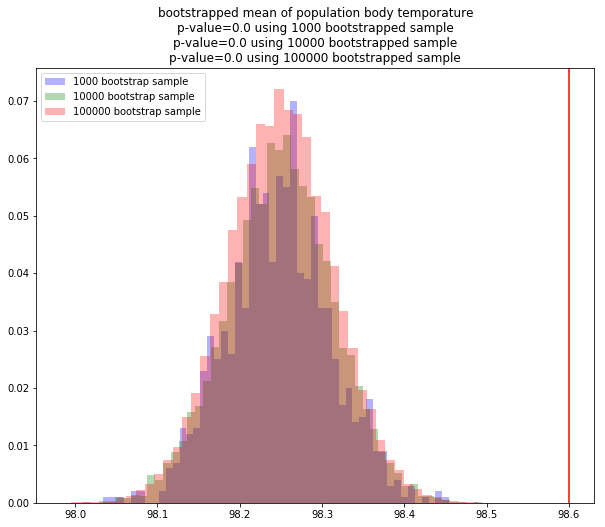

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

p_val_1=sum(bs_mean_1>98.6)/len(bs_mean_1)
p_val_2=sum(bs_mean_2>98.6)/len(bs_mean_2)
p_val_3=sum(bs_mean_3>98.6)/len(bs_mean_3)

plt.title('bootstrapped mean of population body temporature\n'+
          'p-value={} using 1000 bootstrapped sample\n'.format(p_val_1)+
         'p-value={} using 10000 bootstrapped sample\n'.format(p_val_2)+
         'p-value={} using 100000 bootstrapped sample'.format(p_val_3)
          )

weights = np.ones_like(bs_mean_1)/float(len(bs_mean_1))
plt.hist(bs_mean_1, bins=50, color='b', alpha=0.3, weights=weights, label='1000 bootstrap sample')

weights = np.ones_like(bs_mean_2)/float(len(bs_mean_2))
plt.hist(bs_mean_2, bins=50, color='g', alpha=0.3, weights=weights, label='10000 bootstrap sample')

weights = np.ones_like(bs_mean_3)/float(len(bs_mean_3))
plt.hist(bs_mean_3, bins=50, color='r', alpha=0.3, weights=weights, label='100000 bootstrap sample')

plt.axvline(x=98.6, color='red')

plt.legend()
plt.show()

It shows that bootstrap tests reject the hypothesis that popualtion average=98.6 at sample size 1000, 10000 and 100000